# Neural Networks from scratch

https://www.youtube.com/watch?v=Wo5dMEP_BbI

### P.1 Intro and Neuron Code

We call them neural networks because they look, visually, like neural networks. The neurons have different layers. In the video, there is an input layer, two hidden layers, and an output layer.

The end goal of neural networks, like most machine learning, is to take some input data and produce output data that we desire. We can do this by tuning the weights and biases. That is the actual training process. The number of biases is the same as the number of nodes (sum of nodes from each layer combined). A node in one layer is connected to nodes in the next layer by weights. The number of weights is the number of biases in one layer times the number of biases in the next layer plus the same thing for the next layer etc. So the total number of tunable parameters is the number of weights and biases. This ends up being a huge number.

The hard part of neural networks and deep learning is figuring out how to tune it.


In [1]:
import sys
import numpy as np
import matplotlib
print("Python: ",sys.version)
print("Numpy: ", np.__version__)
print("Matplotlib: ", matplotlib.__version__)

Python:  3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:29) [Clang 14.0.6 ]
Numpy:  1.24.1
Matplotlib:  3.6.2


In [2]:
inputs = [1,2,3,2.5] #unique inputs from three neurons in the previous layer

weights1 = [0.2,0.8,-0.5,1.0] 
weights2 = [0.5, -0.91, 0.26, -0.5] 
weights3 = [-0.26, -0.27, 0.17, 0.87] 

bias1 = 2 #every unique neuron has a unique bias
bias2 = 3
bias3 = 0.5

output = \
[inputs[0]*weights1[0]+inputs[1]*weights1[1]+inputs[2]*weights1[2]+inputs[3]*weights1[3]+bias1,
 inputs[0]*weights2[0]+inputs[1]*weights2[1]+inputs[2]*weights2[2]+inputs[3]*weights2[3]+bias2,
 inputs[0]*weights3[0]+inputs[1]*weights3[1]+inputs[2]*weights3[2]+inputs[3]*weights3[3]+bias3]
print(output)

[4.8, 1.21, 2.385]


Why is there only one bias? The inputs are only going into one node. 3 inputs means 3 weights but every neuron has just one bias.

### Part 3. The dot product

zip combines lists into list of lists, element-wise

In [3]:
weights = [weights1,weights2,weights3] 
biases = [bias1,bias2,bias3]
np.shape(weights),np.shape(biases)

((3, 4), (3,))

In [4]:
layer_outputs = [] #output of current layer
for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0 #output of given neuron
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input*weight
    neuron_output += neuron_bias
    layer_outputs.append(neuron_output)
print(layer_outputs)

[4.8, 1.21, 2.385]


Weights and biases are the things that are tuned to fit the data. 

In [5]:
some_values = -0.5
weight = 0.7
bias = 0.7
print(some_values*weight) #weight was a multiple of the value
print(some_values+bias)   #bias has offset the value
#like y=mx+b, b is bias, m is weight, they are two tools that help in different ways

-0.35
0.19999999999999996


A tensor is an object that can be represented as an array. It is not just an array. A tensor is represented by an array.

In [6]:
inputs = [1,2,3,2.5]
weights = [weights1,weights2,weights3] 
biases = [bias1,bias2,bias3]
np.dot(weights,inputs)+biases

array([4.8  , 1.21 , 2.385])

### part 4: Batches, layer, and objects

Batchesare used because we can calculate them in parallel. The bigger the batch, the more parallel operations we can run. CPUs only have like 4-8 cores. That's not very much. GPUs have hundreds/thousands of cores. The other reason we use batches is to help with generalizations.

The size of the batch helps each neuron fit the data. Batch size 32 seems pretty common.

In [7]:
inputs = np.array([[1,2,3,2.5],
         [2.0,5.0,-1.0,2.0],
         [-1.5,2.7,3.3,-0.8]])
weights = np.array([weights1,weights2,weights3])
biases = [bias1,bias2,bias3]

weights_layer2 = np.array([[0.1,-0.14,0.5],
                            [-0.5,0.12,-0.33],
                            [-0.44,0.73,-0.13]])
biases_layer2 = np.array([-1,2,-0.5])

layer1_outputs = np.dot(inputs,weights.T)+biases
layer2_outputs = np.dot(layer1_outputs,weights_layer2.T)+biases_layer2
layer2_outputs

array([[ 0.5031 , -1.04185, -2.03875],
       [ 0.2434 , -2.7332 , -5.7633 ],
       [-0.99314,  1.41254, -0.35655]])

In matrix multiplications,
$$ Z = XY $$

If shape of X is [n,m], the shape of Y must be [m,l]

When you save a model, you are just saving the weights and biases

In [8]:
np.random.seed(0)

X = np.array([[1,2,3,2.5],
             [2.0,5.0,-1.0,2.0],
             [-1.5,2.7,3.3,-0.8]])

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1*np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self,inputs):
        self.output = np.dot(inputs,self.weights) + self.biases
layer1 = Layer_Dense(4,5) #four inputs and 5 neurons
layer1.forward(X) #four inputs. Can have any number of neurons.
print(layer1.output)

layer2 = Layer_Dense(5,2) # 5 inputs and 2 neurons. Must have same # of inputs as neurons in prev. layer
layer2.forward(layer1.output) 
print(layer2.output)

[[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]
[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


## Part 5 Activiation function

What are they and why are we using them. First we will use a step function as the activation function. Each neuron will have an activation function associated. It comes into play after you do the inputs times the weights plus the bias. The step function will be either 0 or 1.

What about a sigmoid activation function? $y=\frac{1}{1+e^{-x}}$. It's a little easier to train a NN with the sigmoid due to the granularity (smoother?) of the output. The next steps would to be to calculate loss... how wrong is the neural network. Then an optimizer could be use to optimize the weights and bias values to decrease loss. We would need to know the impact of these weights and biases on these individual values. 

Another option is the rectified linear activation (ReLU) function. The output can be granular. Why use ReLU vs sigmoid? ReLU is simpler and so faster. It also just works. This is the most popular activation function.

What is the point of an activation function? Without it, you can't fit non-linear things. ReLU is almost linear, but the rectified part is exatly what makes it powerful and able to fit non-linear data.

In order to fit non-linear problems with neural networds, you need two or more hidden layers. And with those layers, you can use non-linear activation functions.

In [9]:
np.random.seed(0)

X = np.array([[1,2,3,2.5],
             [2.0,5.0,-1.0,2.0],
             [-1.5,2.7,3.3,-0.8]])

inputs = [0,2,-1,3.3,-2.7,1.1,2.2,-100]
output = []

for i in inputs:
    output.append(max(0,i))
    # if i >0:
    #     output.append(i)
    # elif i<=0:
    #     output.append(0)
output

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]

In [36]:
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

# X = np.array([[1,2,3,2.5],
#              [2.0,5.0,-1.0,2.0],
#              [-1.5,2.7,3.3,-0.8]])
X,y = spiral_data(100,3)

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1*np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self,inputs):
        self.output = np.dot(inputs,self.weights) + self.biases
        
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0,inputs)
        
layer1 = Layer_Dense(2,5) #2 unique features decribe the results
activation1 = Activation_ReLU()
layer1.forward(X)
activation1.forward(layer1.output)
print(activation1.output)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504505e-04
  4.56846210e-05]
 [0.00000000e+00 5.93469958e-05 0.00000000e+00 2.03573116e-04
  6.10024377e-04]
 ...
 [1.13291524e-01 0.00000000e+00 0.00000000e+00 8.11079666e-02
  0.00000000e+00]
 [1.34588361e-01 0.00000000e+00 3.09493970e-02 5.66337556e-02
  0.00000000e+00]
 [1.07817926e-01 0.00000000e+00 0.00000000e+00 8.72561932e-02
  0.00000000e+00]]


### Neural Networks from Scratch - P.6 Softmax Activation

Why are we using another activiation function?

The first step in training a model is determining how wrong the model is. Accuracy isn't the best way to do this. 

Consider, what is our objective here. Maybe a probability distribution of image classification. We want uniformity between sample to sample and normalized from neuron to neuron. Then we can calculate rightness and wrongness. How do we get to that point though.

The problem with ReLU is because normalization doesn't work for negative numbers. Absolute values or squaring isn't a good option either.

One thing to try is using an exponential function: $y = e^x$. No value of y can be negative.

SOFTMAX IS JUST EXPONENTIAL AND THEN NORMALIZATION

In [60]:
import numpy as np
layer_outputs = [[4.8, 1.21, 2.385],
                 [8.9, -1.81, 0.2],
                 [1.41, 1.051, 0.026]]
exp_values = np.exp(layer_outputs) 
# norm_values = np.sum(exp_values,axis=1) #axis0 is columns, axis 1 is rows
# kinda dumb option (exp_values.T/norm_values).T
norm_values = np.sum(exp_values,axis=1, keepdims=True) #keep in "batch" form

In [62]:
exp_values/norm_values #this is better

array([[8.95282664e-01, 2.47083068e-02, 8.00090293e-02],
       [9.99811129e-01, 2.23163963e-05, 1.66554348e-04],
       [5.13097164e-01, 3.58333899e-01, 1.28568936e-01]])

But exponential function will cause an overflow error if number is big enough

#### Overflow prevention

$v = u - max(u)$

In [86]:
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10*np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self,inputs):
        self.output = np.dot(inputs,self.weights) + self.biases
        
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0,inputs)      
        
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs,axis=1,keepdims=True))
        probabilities = exp_values/np.sum(exp_values,axis=1,keepdims=True)
        self.output = probabilities
        
X,y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33331734 0.33331832 0.33336434]
 [0.3332888  0.33329153 0.33341965]
 [0.33325943 0.33326396 0.33347666]
 [0.33323312 0.33323926 0.33352762]]


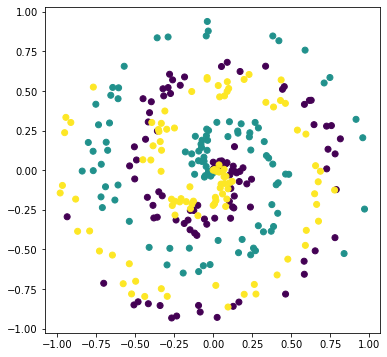

In [84]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X.T[0], X.T[1], c=y)

### Neural Networks from Scratch - P.7 Calculating Loss with Categorical Cross-Entropy

Now we need to way to calculate how wrong things are. This is before backpropagation and optimization.

We need a metric for error. Accuracy isn't good. We are throwing away a lot of useful information. The neural network outputs a confidence score. 

We can use a loss function to quantify how wrong the model is. One example is mean absolute error. It is used in regression. The closer you are to the target data, the smaller the mean absolute error. 

The loss function of choice for classification is categorical cross-Entropy.

$$ L_i = -\Sigma_j y_{i,j} log(\hat y_{i,j})$$

where Li is sample loss value, i is ith sample in a set, j is the label/output index, y=target values, yhat it predicted values. This is the negative sum of the target value times the log of predicted value.

One hot encoding let's us do this:

$$ L_i = -log(\hat y_{i,j})$$

This works and is convenient in back propagation and optimization steps.

This is using the natural logarithm. Log base e.


In [102]:
import math

softmax_output = [0.7,0.1,0.2]
target_output = [1,0,0]

loss = - math.log(softmax_output[0])*target_output[0]
loss 

0.35667494393873245

high loss means more wrong

### Neural Networks from Scratch - P.8 Implementing Loss



In [105]:
softmax_outputs = np.array([[0.7,0.1,0.2],
                          [0.1,0.5,0.4],
                          [0.02,0.9,0.08]])
class_targets = [0,1,1]
softmax_outputs[[0,1,2],class_targets]

array([0.7, 0.5, 0.9])

In [117]:
# neg_log = -np.log(softmax_outputs[
#     range(len(softmax_outputs)),class_targets
#                        ])

# np.mean(neg_log)

0.38506088005216804

In [132]:
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10*np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self,inputs):
        self.output = np.dot(inputs,self.weights) + self.biases
        
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0,inputs)      
        
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs,axis=1,keepdims=True))
        probabilities = exp_values/np.sum(exp_values,axis=1,keepdims=True)
        self.output = probabilities
        
class Loss:
    def calculate(self,output,y):
        sample_losses = self.forward(output,y)
        data_loss = np.mean(sample_losses)
        return data_loss
        
class Loss_CategoricalCrossEntropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred,1e-7,1-1e-7)
        
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples),y_true]

        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true,axis=1)
            
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
        
X,y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])
loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(activation2.output,y)
print("Loss:",loss)

[[0.33333334 0.33333334 0.33333334]
 [0.33331734 0.33331832 0.33336434]
 [0.3332888  0.33329153 0.33341965]
 [0.33325943 0.33326396 0.33347666]
 [0.33323312 0.33323926 0.33352762]]
Loss: 1.098445


### Neural Networks from Scratch - P.9 Introducing Optimization and derivatives
